In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = np.load('dataset/dataset.npz')

dataset contains four files
* arr_0 = train label
* arr_1 = train images
* arr_2 = test label
* arr_3 = test images

In [3]:
dataset.files

['arr_1', 'arr_0', 'arr_3', 'arr_2']

In [4]:
label_train = dataset['arr_1']
image_train = dataset['arr_0']
label_test = dataset['arr_3']
image_test = dataset['arr_2']

Print the length of train image

In [5]:
len(image_train)

78200

In [6]:
len(image_test)

13800

(<matplotlib.axes._subplots.AxesSubplot at 0x11d5bbcc0>,
 Text(0.5, 1.0, '39'))

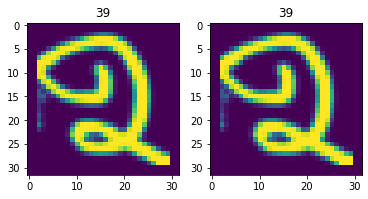

In [7]:
plt.subplot(121),plt.imshow(image_train[0]), plt.title(label_train[0])
plt.subplot(122),plt.imshow(image_train[0]), plt.title(label_train[1])